# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

(You need to write your answer in this markdown cell)

In [2]:
import pandas as pd
df = pd.read_csv("listings.csv")
listing_num = len(df["listing_url"].unique())
print("The number of unique listings is",listing_num)

hosts_num = len(df["host_id"].unique())
print("The number of unique hosts is",hosts_num)


The number of unique listings is 45053
The number of unique hosts is 26286


D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

According to the definition of each column, calculated_host_listings_count is continious value which is actual number of host listings. Thus we use this column to calculate the number of listings per host.

The mean of the number of listings per host is 1.713954.

The median of the number of listings per host is 1.

The standard deviation of the number of listings per host is 2.999183.

The minimum of the number of listings per host is 1.

The maximum of the number of listings per host is 172.

In [30]:
import numpy as np

df_gb = df.groupby(["host_id"])

# Obtain the list which contains the unique host id
list_id = [id for id in df["host_id"].unique()]

# Stores the number of listings per host in a list
num_of_listings_per_host = [df_gb.get_group(id).calculated_host_listings_count.mean() for id in list_id]

# Use simple functions to obtain the statistical figures
mean = np.mean(num_of_listings_per_host)
median = np.median(num_of_listings_per_host)
std = np.std(num_of_listings_per_host)
minimum = min(num_of_listings_per_host)
maximum = max(num_of_listings_per_host)

print("The mean of the number of listings per host is %0.2f." %mean)
print("The median of the number of listings per host is %d." %median)
print("The standard deviation of the number of listings per host is %0.3f." %std)
print("The minimum of the number of listings per host is %d." %minimum)
print("The maximum of the number of listings per host is %d." %maximum)

# Convert the list into a dataframe, and use .describe() to obtain the statistical figures
df_num_of_listings_per_host = pd.DataFrame({"number":num_of_listings_per_host})
df_num_of_listings_per_host.describe()    

The mean of the number of listings per host is 1.71.
The median of the number of listings per host is 1.
The standard deviation of the number of listings per host is 2.999.
The minimum of the number of listings per host is 1.
The maximum of the number of listings per host is 172.


,number
count,26286.000000
mean,1.713954
std,2.999183
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,172.000000


### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**
The average of listings for super hosts is 1.824264, while that of super hosts is 1.671021.

The standard deviation of listings for super hosts is 3.177892, while that of super hosts is 2.926276.

A super host does have more listings on average.


In [31]:
# Split the original dataframe according to the value of "host_is_superhost" column
# Store the rows of super host in df_super
df_super = df[df["host_is_superhost"]=="t"]

# Group by the new dataframe according to the id
super_gb = df_super.groupby(["host_id"])

# Obtain the unique id list of super host
super_id = [id for id in df_super["host_id"].unique()]

# Obtain the list of number of each id  
num_of_listings_super_host = [super_gb.get_group(id).calculated_host_listings_count.mean() for id in super_id]

# Convert the list into dataframe and use describe funtion to obtain the statistical results
df_num_of_listings_super_host = pd.DataFrame({"number":num_of_listings_super_host})
df_num_of_listings_super_host.describe()


,number
count,7369.000000
mean,1.824264
std,3.177892
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,172.000000


In [32]:
# Store the rows of non-super host in df_super
df_nonsuper = df[df["host_is_superhost"]=="f"]

# Group by the new dataframe according to the id
nonsuper_gb = df_nonsuper.groupby(["host_id"])

# Obtain the unique id list of non-super host
nonsuper_id = [id for id in df_nonsuper["host_id"].unique()]

# Obtain the list of number of each id  
num_of_listings_nonsuper_host = [nonsuper_gb.get_group(id).calculated_host_listings_count.mean() for id in nonsuper_id]

# Convert the list into dataframe and use describe funtion to obtain the statistical results
df_num_of_listings_nonsuper_host = pd.DataFrame({"number":num_of_listings_nonsuper_host})
df_num_of_listings_nonsuper_host.describe()

,number
count,18907.000000
mean,1.671021
std,2.926276
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,137.000000


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**
There are 21 types of host verifications. They are 

'None', 'email', 'facebook', 'google', 'government_id', 'identity_manual', 'jumio', 'kba', 'manual_offline', 'manual_online', 'offline_government_id', 'phone', 'photographer', 'reviews', 'selfie', 'sent_id', 'sesame', 'sesame_offline', 'weibo', 'work_email', 'zhima_selfie'


In [4]:
from copy import *

# Firstly, we should obtain the nonredundant dataframe which contain "host_id" and "host_verifications" two columns
verifications = []
unique_df = df.drop_duplicates(["host_id","host_verifications"])

#Because values in the "host_verifications" column are string, we have to use string function to parse them
for i in unique_df["host_verifications"]:
    for item in i.strip("[").strip("]").split("'"):
        if len(item)>2:
            verifications.append(item)
            
unique_verifications = sorted(np.unique(verifications))
print("There are %d types of host verifications."%len(unique_verifications),'\n')
print(unique_verifications)



There are 21 types of host verifications. 

['None', 'email', 'facebook', 'google', 'government_id', 'identity_manual', 'jumio', 'kba', 'manual_offline', 'manual_online', 'offline_government_id', 'phone', 'photographer', 'reviews', 'selfie', 'sent_id', 'sesame', 'sesame_offline', 'weibo', 'work_email', 'zhima_selfie']


### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

The most popular verification types of hosts are 
 [('phone', 26201), ('email', 24666), ('reviews', 18099), ('government_id', 15448), ('jumio', 11392)]
 
99.7% of hosts verified phone.

93.8% of hosts verified email.

68.9% of hosts verified reviews.

58.8% of hosts verified government_id.

43.3% of hosts verified jumio.

In [172]:
# In the last chunk of code, I use verifications to store the values of all verification methods of all hosts. Considering that each 
# verification method at most appear once for each id, thus we can count the total times of occurrence of each method as the appearance 
# frequency, and then devide them by the total number of id. 
popularity = {}
for item in set(verifications): # Use set() to obtain a list of unique verification methods
    popularity[item] = verifications.count(item)
rank = sorted(popularity.items(), key = lambda x:x[1], reverse = True)
print("The most popular verification types of hosts are \n",rank[:5])
print("%0.1f percent of hosts verified phone."%(rank[0][1]/len(unique_df)*100))
print("%0.1f percent of hosts verified email."%(rank[1][1]/len(unique_df)*100))
print("%0.1f percent of hosts verified reviews."%(rank[2][1]/len(unique_df)*100))
print("%0.1f percent of hosts verified government_id."%(rank[3][1]/len(unique_df)*100))
print("%0.1f percent of hosts verified jumio."%(rank[4][1]/len(unique_df)*100))


The most popular verification types of hosts are 
 [('phone', 26201), ('email', 24666), ('reviews', 18099), ('government_id', 15448), ('jumio', 11392)]
99.7 percent of hosts verified phone.
93.8 percent of hosts verified email.
68.9 percent of hosts verified reviews.
58.8 percent of hosts verified government_id.
43.3 percent of hosts verified jumio.


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

The mean of the average price of a listing in this period of time is $257.890021.

The standard deviation of the average price of a listing in this period of time is $10.209746.

In [15]:
import pandas as pd
df_calendar = pd.read_csv("calendar.csv")
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2019-09-14,f,$115.00,$115.00,30,730
1,109,2019-09-15,f,$115.00,$115.00,30,730
2,109,2019-09-16,f,$115.00,$115.00,30,730
3,109,2019-09-17,f,$115.00,$115.00,30,730
4,109,2019-09-18,f,$115.00,$115.00,30,730


In [16]:
from pandas import to_datetime
# Conver the date column into time.
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')

# Set index as time, so it is very convenient to take out certain rows
df_calendar['Date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')
df_calendar = df_calendar.set_index("Date")

# Obtain the subset of available room during this period of time
df_sub_calendar = df_calendar.loc[(df_calendar.date >= pd.Timestamp(2020,1,1)) & \
                                  (df_calendar.date <= pd.Timestamp(2020,3,1)) & \
                                  (df_calendar["available"]=="t")]

# Because the type of price column is string(containing a dollar sign), thus we should convert it into float first.
def re_dollarsign(row):
    try:
        value = float(row["price"].strip("$").replace(",",""))
    except AttributeError:
        value = row["price"]
    return value
df_sub_calendar["price"] = df_sub_calendar.apply(re_dollarsign, axis = 1)

# Apply .describe() funcation to get the statistical information of price column.
avg_price_df = df_sub_calendar.groupby(by = ["date"]).price.mean()
avg_price_df.describe()

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count     61.000000
mean     257.890021
std       10.209746
min      250.559678
25%      251.335074
50%      252.984800
75%      260.818419
max      298.758443
Name: price, dtype: float64

The mean of the average price of a listing in this period of time is $257.890021.

The standard deviation of the average price of a listing in this period of time is $10.209746.

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

The top ten popular words of comments in Jan, 2016 are "great, stay, place, clean, location, house, us, nice, would, host".

The top ten popular words of comments in March, 2017 are "great, place, stay, location, clean, nice, would, host, house, comfortable".

The top ten popular words of comments in April, 2018 are "great, place, stay, location, clean, would, host, nice, la, house".

In [4]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

df_reviews = pd.read_csv("reviews.csv")

df_reviews["date"] = pd.to_datetime(df_reviews["date"], format="%Y-%m-%d")

# Set index as date
df_reviews["Date"] = pd.to_datetime(df_reviews["date"], format="%Y-%m-%d")
df_reviews = df_reviews.set_index(["Date"])


In [9]:
# Parse the comments of Jan,2016 and store the words in words_count1. 
# Convert each word in lower case in order to count 
subset1_df_reviews = df_reviews["2016-01"]
words_count1 = {}
for i in subset1_df_reviews["comments"]:
    comment = str(i).replace("’","")
    comment = comment.translate(str.maketrans('','',string.punctuation))
    comment = comment.translate(str.maketrans('','','1234567890'))
    word_tokens = word_tokenize(comment.lower()) 
    for j in word_tokens:
        try:
            words_count1[j.lower()] += 1
        except:
            words_count1[j.lower()] = 1

# Delete stopping words and pure space
clean_words_count1 = words_count1.copy()
for key in words_count1.keys():
    if key in stopwords.words("english"):
        del clean_words_count1[key]
    elif key == " ":
        del clean_words_count1[key]
    elif key == "":
        del clean_words_count1[key]

# Sort the parsed words
sorted(clean_words_count1.items(), key=lambda x:x[1],reverse = True)[:10]

[('great', 5421),
 ('stay', 4707),
 ('place', 4321),
 ('clean', 2744),
 ('location', 2744),
 ('house', 2674),
 ('us', 2646),
 ('nice', 2424),
 ('would', 2416),
 ('host', 2349)]

The top ten popular words of comments in Jan, 2016 are "great, stay, place, clean, location, house, us, nice, would, host".


In [12]:
subset2_df_reviews = df_reviews["2017-03"]
words_count2 = {}
for i in subset2_df_reviews["comments"]:
    comment = str(i).replace("’","")
    comment = comment.translate(str.maketrans('','',string.punctuation))
    comment = comment.translate(str.maketrans('','','1234567890'))
    word_tokens = word_tokenize(comment.lower()) 
    for j in word_tokens:
        try:
            words_count2[j.lower()] += 1
        except:
            words_count2[j.lower()] = 1

# Delete stopping words and pure space
clean_words_count2 = words_count2.copy()
for key in words_count2.keys():
    if key in stopwords.words("english"):
        del clean_words_count2[key]
    elif key == " ":
        del clean_words_count2[key]
    elif key == "":
        del clean_words_count2[key]

# Sort the parsed words
sorted(clean_words_count2.items(), key=lambda x:x[1],reverse = True)[:10]

[('great', 12254),
 ('place', 11567),
 ('stay', 9508),
 ('location', 5920),
 ('clean', 5478),
 ('nice', 4566),
 ('would', 4565),
 ('host', 4475),
 ('house', 3801),
 ('comfortable', 3797)]

The top ten popular words of comments in March, 2017 are "great, place, stay, location, clean, nice, would, host, house, comfortable".

In [13]:
subset3_df_reviews = df_reviews["2018-04"]
words_count3 = {}
for i in subset3_df_reviews["comments"]:
    comment = str(i).replace("’","")
    comment = comment.translate(str.maketrans('','',string.punctuation))
    comment = comment.translate(str.maketrans('','','1234567890'))
    word_tokens = word_tokenize(comment.lower()) 
    for j in word_tokens:
        try:
            words_count3[j.lower()] += 1
        except:
            words_count3[j.lower()] = 1

# Delete stopping words and pure space
clean_words_count3 = words_count3.copy()
for key in words_count3.keys():
    if key in stopwords.words("english"):
        del clean_words_count3[key]
    elif key == " ":
        del clean_words_count3[key]
    elif key == "":
        del clean_words_count3[key]

# Sort the parsed words
sorted(clean_words_count3.items(), key=lambda x:x[1],reverse = True)[:10]

[('great', 18942),
 ('place', 18730),
 ('stay', 14810),
 ('location', 10089),
 ('clean', 9097),
 ('would', 7398),
 ('host', 6857),
 ('nice', 6836),
 ('la', 5610),
 ('house', 5572)]

The top ten popular words of comments in April, 2018 are "great, place, stay, location, clean, would, host, nice, la, house".

### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**
Our filter condition is unique id >30.

The five zipcode which has the highest average listing price are 90210, 90077, 90265, 90069, 91436.

Prices: 1963.5573672935016, 1909.0661304736373, 1559.6050096339113, 991.5629529346181, 742.6600189933523

Unique listings: 278, 74, 329, 426, 306

Unique host id: 173, 48, 221, 306, 33

[('90210', [1963.5573672935016, 278, 173]),
 ('90077', [1909.0661304736373, 74, 48]),
 ('90265', [1559.6050096339113, 329, 221]),
 ('90069', [991.5629529346181, 426, 306]),
 ('91436', [742.6600189933523, 40, 33])]

In [17]:
# Take ["listing_id","date","available","price","adjusted_price"] columns from calendar dataframe and save it as sub_1
sub_1 = df_calendar[["listing_id","date","available","price","adjusted_price"]]
sub_1 = sub_1.rename(columns = {"listing_id":"id"})

# Take ["id","host_id","zipcode","beds"] columns from listing dataframe and save it as sub_2
sub_2 = df[["id","host_id","zipcode","beds"]]
sub_2 = sub_2.fillna(0)

# Merge sub_1 and sub_2 into sub_3
sub_3 = pd.merge(sub_1,sub_2, how = "inner", on = "id")
sub_3["Date"] = sub_3["date"]
sub_3 = sub_3.set_index(["Date"])

# Because the type of price column is string(containing a dollar sign), thus we should convert it into float first.
def remove_dollarsign(price):
    try:
        value = float(price.strip("$").replace(",",""))
    except AttributeError:
        value = price
    return value
sub_3["price"] = sub_3.price.apply(remove_dollarsign)
sub_3["adjusted_price"] = sub_3.adjusted_price.apply(remove_dollarsign)

# Because the zipcode column is mixed with dirty data, we have to parse it first
def parse_zipcode(zipcode):
    if len(str(zipcode)) == 5:
        return str(zipcode)
    elif len(str(zipcode)) != 5:
        for j in str(zipcode).split(" "):
            for item in j.split("-"):
                if len(str(item)) == 5:
                    return item
    elif zipcode == "NaN":
        return "Not Available"
sub_3["zipcode"] = sub_3.zipcode.apply(parse_zipcode)
        

In [18]:
# Take the rows of which the house is available during 2020-01-01 to 2020-02-01
new_sub = sub_3["2020-01-01":"2020-02-01"]
new_sub = new_sub[new_sub["available"]=="t"]

# Find the zipcode which has more than 30 listings
# Calculate the mean price, and numbers of unique listing and unique host of each zipcode
zip_price = {}
new_sub_gb = new_sub.groupby(["zipcode"])

for i in set(new_sub["zipcode"]):
    try: # if the zipcode = None, the loop will break. Thus, I use try and except to eliminate this 
        if new_sub_gb.get_group(i)["host_id"].nunique() >30:
            zip_price.setdefault(i,[]).append(new_sub_gb.get_group(i)["price"].mean())
            zip_price.setdefault(i,[]).append(new_sub_gb.get_group(i)["id"].nunique())
            zip_price.setdefault(i,[]).append(new_sub_gb.get_group(i)["host_id"].nunique())
    except KeyError:
        continue
sorted(zip_price.items(), key = lambda x:x[1][0], reverse = True)[:5]

[('90210', [1963.5573672935016, 278, 173]),
 ('90077', [1909.0661304736373, 74, 48]),
 ('90265', [1559.6050096339113, 329, 221]),
 ('90069', [991.5629529346181, 426, 306]),
 ('91436', [742.6600189933523, 40, 33])]

In [96]:
# new_sub.to_csv("Q8.csv",sep = ",")

### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**
Our filter condition is listing number >30.

The five zipcodes that have largest absolute price differences are 91384, 90265, 91210, 93563, 90210.

Price differences: 22.547185, 20.103059, 19.602980, 15.555556, 10.723267.

We ignore the availability status of each listing because we care about the price variation no matter the house is available or not.

In [15]:
# Take a sub dataframe from parsed dataframe sub_3
import datetime as dt
weekend = pd.DataFrame()
weekday = pd.DataFrame()
new_sub2 = sub_3["2020-01-01":"2020-04-01"]
# Ignore the availability. In other words, we include the listings whose availability equals to f.


In [16]:
# According to whether the date is a weekday or weekend, divide the new_sub2 into two dataframes
for day in set(new_sub2["date"]):
    if day.weekday() in [5,6]:
        weekend = weekend.append(new_sub2[new_sub2["date"] == day])
        
    else:
        weekday = weekday.append(new_sub2[new_sub2["date"] == day])

In [18]:
# Obtain the average price of each zipcode 
weekend_zip_price = {}
weekend_gb = weekend.groupby(["zipcode"])
for i in set(weekend["zipcode"]):
    try: # if the zipcode = None, the loop will break. Thus, I use try and except to eliminate this 
        if weekend_gb.get_group(i).shape[0] >30:
            weekend_zip_price[i] = weekend_gb.get_group(i)["price"].mean()
    except KeyError:
        continue

weekday_zip_price = {}
weekday_gb = weekday.groupby(["zipcode"])
for i in set(weekday["zipcode"]):
    try: # if the zipcode = None, the loop will break. Thus, I use try and except to eliminate this 
        if weekday_gb.get_group(i).shape[0] >30:
            weekday_zip_price[i] = weekday_gb.get_group(i)["price"].mean()
    except KeyError:
        continue

In [84]:
# Create two dataframes which store the average price of each zipcode in weekday and weekend
df_weekend = pd.DataFrame(sorted(weekend_zip_price.items(),key = lambda x:x[0]))
df_weekend.rename({0:"Zipcode",1:"Weekend_Price"},axis = 1, inplace = True)

df_weekday = pd.DataFrame(sorted(weekday_zip_price.items(),key = lambda x:x[0]))
df_weekday.rename({0:"Zipcode",1:"Weekday_Price"},axis = 1, inplace = True)

# Merge the two dataframe into one by using left join, because the df_weekday dataframe has more rows
# Create a new row to store the price differences, and then sort this row descendingly.
price_difference = pd.merge(df_weekday,df_weekend, how = "left", on = "Zipcode")
price_difference["Price_Difference"] = abs(price_difference["Weekend_Price"] - price_difference["Weekday_Price"])
price_difference.sort_values(by = ["Price_Difference"], ascending = [False])[:5]

,Zipcode,Weekday_Price,Weekend_Price,Price_Difference
215,91384,138.430670,160.977855,22.547185
88,90265,1397.389489,1417.492548,20.103059
182,91210,330.336580,349.939560,19.602980
292,93563,168.444444,184.000000,15.555556
68,90210,1620.193908,1630.917175,10.723267


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

The average of the daily total capacity is 46995.228261.

The standard deviation of the daily total capacity is 4980.641316.

The average of the daily price per bed is 124.113884.

The standard deviation of the daily price per bed is 5.626011.

In [111]:
new_sub3 = sub_3["2020-01-01":"2020-04-01"]
new_sub3 = new_sub3[new_sub3["available"]=="t"]

capacity_gb = new_sub3.groupby(["date"])
capacity_dic = {}
capacity = []
for i in set(new_sub3["date"]):
    try: # if the zipcode = None, the loop will break. Thus, I use try and except to eliminate this 
        capacity.append(capacity_gb.get_group(i)["beds"].sum())
        capacity_dic[i] = capacity_gb.get_group(i)["beds"].sum()
    except KeyError:
        continue

pd.DataFrame({"capacity":capacity}).describe()

,capacity
count,92.000000
mean,46995.228261
std,4980.641316
min,37768.000000
25%,47112.750000
50%,49507.000000
75%,49979.500000
max,50863.000000


In [114]:
# We are concerned about the average and standard deviation of the price of each
# day, thus we should groub by date
capacity_gb = new_sub3.groupby(["date"])
prices_dic = {}
for i in set(new_sub3["date"]):
    try: # if the zipcode = None, the loop will break. Thus, I use try and except to eliminate this 
        prices_dic[i] = capacity_gb.get_group(i)["price"].sum()
    except KeyError:
        continue

average_prices = [prices_dic[i]/capacity_dic[i] for i in capacity_dic.keys()]
pd.DataFrame({"Average_Prices":average_prices}).describe()

,Average_Prices
count,92.000000
mean,124.113884
std,5.626011
min,118.706267
25%,119.503581
50%,123.259223
75%,128.790266
max,144.658168


## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** What's the causal relationship between month and average price?

**Question 2:** What's the causal relationship between seaon and average price?

**Question 3:** What's the causal relationship between month and total capacity?

**Question 4:** What's the causal relationship between seaon and total capacity?

**Question 5:** What's the causal relationship between month and average price for each type of property?


**Question 1:** What's the causal relationship between month and average price?

In [2]:
import pandas as pd
df_list=pd.read_csv("listings.csv")
reviews_df=pd.read_csv("reviews.csv")
calendar_df=pd.read_csv("calendar.csv")

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
df_p2_q1_r.head()

,listing_id,year,month
0,109,2011,8
1,109,2016,5
2,344,2016,6
3,344,2016,12
4,344,2016,12


In [15]:
## filter out the needed columns
df_p2_q1_l=df_list.loc[:,["id","price"]]
df_p2_q1_r=reviews_df.loc[:,["listing_id","date"]]

## format dates
import datetime as dt

df_p2_q1_r.date=pd.to_datetime(df_p2_q1_r.date)
df_p2_q1_r['year'],df_p2_q1_r['month']=df_p2_q1_r['date'].apply(lambda x: x.year),df_p2_q1_r['date'].apply(lambda x: x.month)
df_p2_q1_r=df_p2_q1_r.loc[:,["listing_id","year","month"]]

## format price into numerics
df_p2_q1_l.price=df_p2_q1_l.price.apply(lambda x:\
                                        float(x.strip("$").replace(",",""))\
                                        if type(x)==str else x)

## inner merge two columns based on id
df_p2_q1=df_p2_q1_l.merge(df_p2_q1_r,how="inner",left_on="id",right_on="listing_id")\
                   .drop("listing_id",axis=1)

df_p2_q1_results=df_p2_q1.groupby(by="month").apply(lambda x:pd.Series(len(x)))\
                                            .reset_index()

df_p2_q1_results.columns=["month","demand"]

## calculate average price based on time
avg_price=df_p2_q1.groupby(by="month").price.mean()
temp_df=pd.DataFrame({"avg_price":avg_price})
df_p2_q1_results=df_p2_q1_results.merge(temp_df,how="inner",left_index=True, on="month")
# df_p2_q1_results = df_p2_q1_results[["month","avg_price"]]

In [16]:
df_p2_q1_results

,month,demand,avg_price
0,1,102163,138.608469
1,2,102611,136.428843
2,3,130010,136.066110
3,4,132292,138.516365
4,5,144773,136.162282
5,6,151016,139.249868
6,7,171890,141.688853
7,8,182389,138.903382
8,9,114822,133.220672
9,10,103923,136.309383


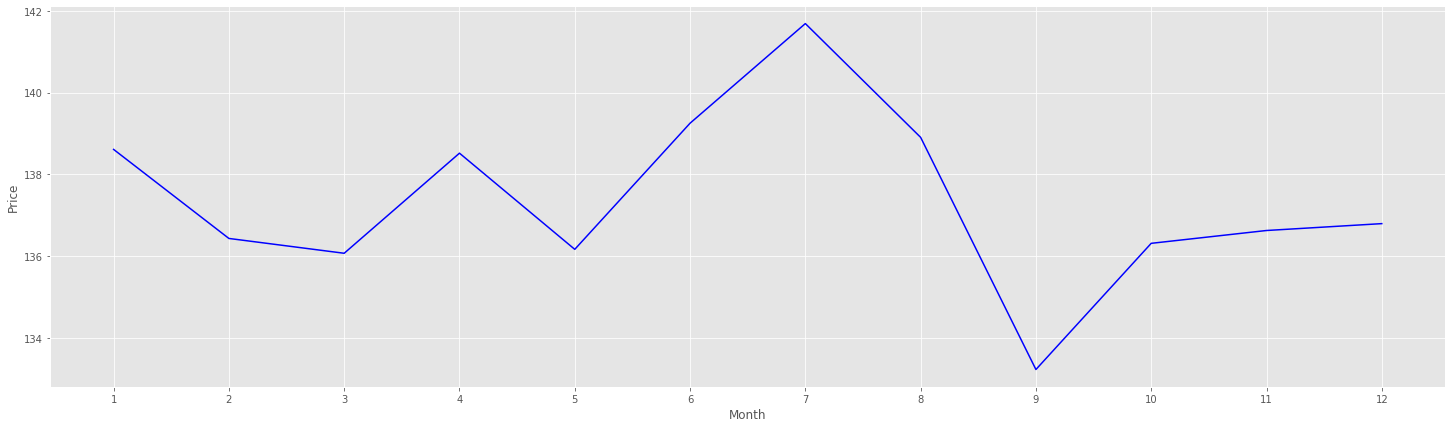

In [17]:
## draw plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("ggplot")
fig,(ax1)=plt.subplots(ncols=1,nrows=1,figsize=(25,7))
month=range(0,13)
plt.xticks(month)

ax1.set_xlabel("Month")
ax1.set_ylabel("Price")
ax1.plot(df_p2_q1_results["month"],df_p2_q1_results["avg_price"],c="Blue")



**Question 2:** What's the causal relationship between seaon and average price?


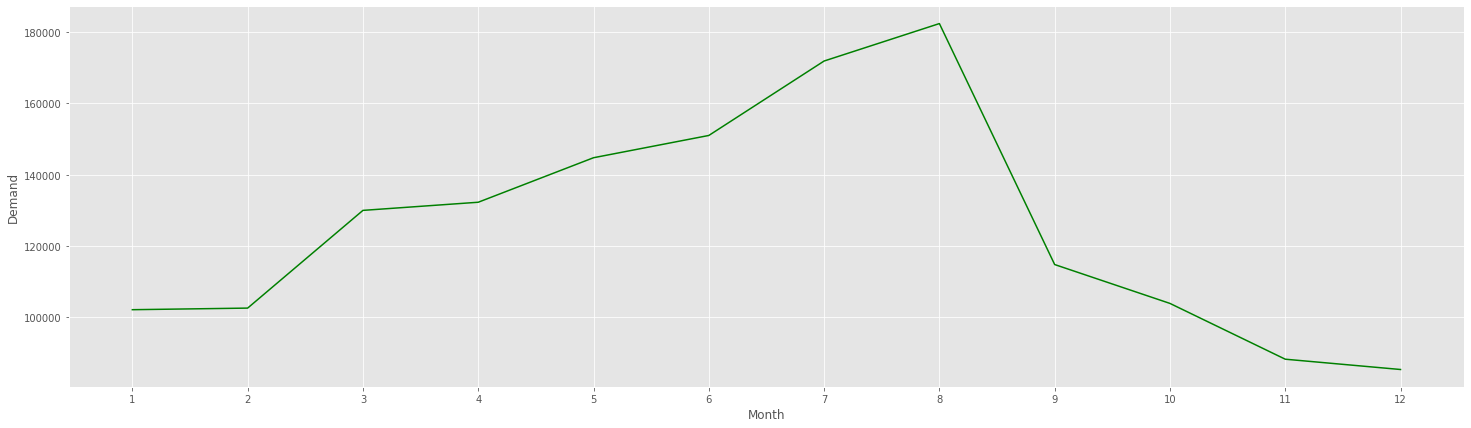

In [19]:
plt.style.use("ggplot")
fig,(ax2)=plt.subplots(ncols=1,nrows=1,figsize=(25,7))
month=range(0,13)
plt.xticks(month)

ax2.set_xlabel("Month")
ax2.set_ylabel("Demand")
ax2.plot(df_p2_q1_results["month"],df_p2_q1_results["demand"],c="Green")


**Question 3:** What's the causal relationship between month and total capacity?


In [20]:
df_p2_q1_l=df_list.loc[:,["id","price"]]
df_p2_q3_r=reviews_df.loc[:,["listing_id",'date']]
df_p2_q3_r['Qtr']=pd.to_datetime(df_p2_q3_r.date).dt.quarter

df_p2_q1_l.price=df_p2_q1_l.price.apply(lambda x:\
                                        float(x.strip("$").replace(",",""))\
                                        if type(x)==str else x)

df_p2_q3=df_p2_q1_l.merge(df_p2_q3_r,how="inner",left_on="id",right_on="listing_id")\
                   .drop("listing_id",axis=1)

df_p2_q3_results=df_p2_q3.groupby(by="Qtr").apply(lambda x:pd.Series(len(x)))\
                                            .reset_index()

df_p2_q3_results.columns=["Qtr","demand"]
# print(df_p2_q3_results)

avg_price_Q=df_p2_q3.groupby(by="Qtr").price.mean()
temp_df=pd.DataFrame({"avg_price":avg_price_Q})
# temp_df
df_p2_q3_results=df_p2_q3_results.merge(temp_df,how="inner",left_index=True, on="Qtr")

print(df_p2_q3_results)

   Qtr  demand   avg_price
0    1  334784  136.953116
1    2  428081  137.978997
2    3  469101  138.533088
3    4  277598  136.557587


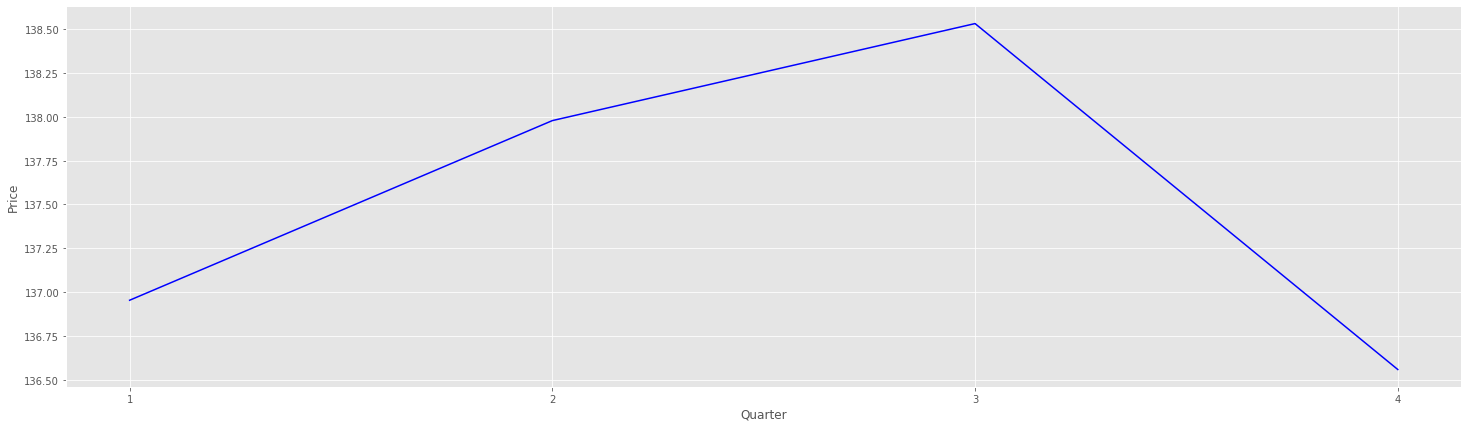

In [21]:
## draw plots
plt.style.use("ggplot")
fig,(ax3)=plt.subplots(ncols=1,nrows=1,figsize=(25,7))
Qtr=range(0,5)
plt.xticks(Qtr)

ax3.set_xlabel("Quarter")
ax3.set_ylabel("Price")
ax3.plot(df_p2_q3_results["Qtr"],df_p2_q3_results["avg_price"],c="Blue")

**Question 4:** What's the causal relationship between seaon and total capacity?


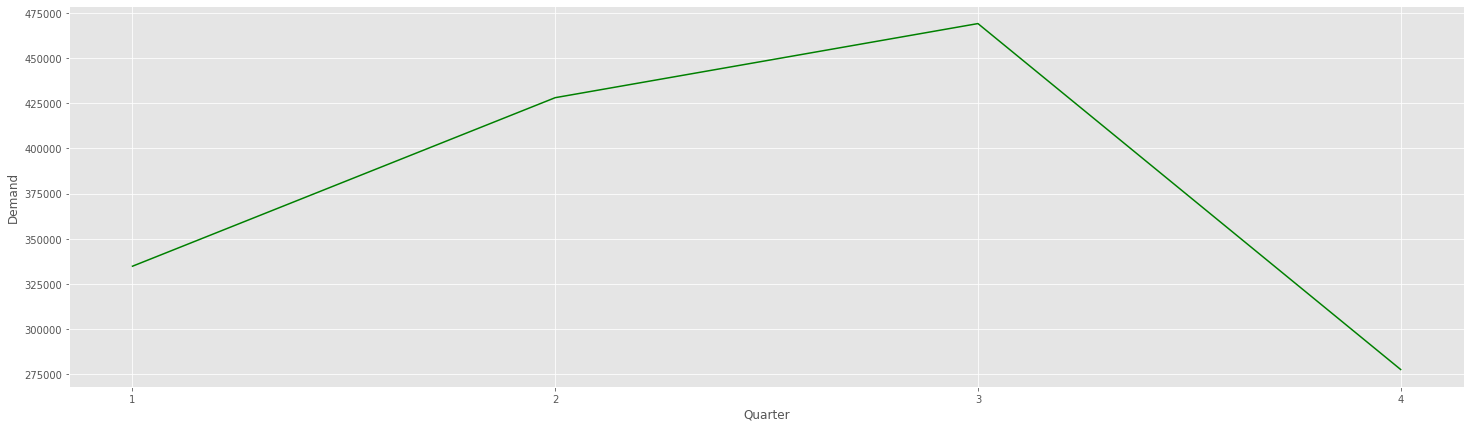

In [22]:
plt.style.use("ggplot")
fig,(ax4)=plt.subplots(ncols=1,nrows=1,figsize=(25,7))
Qtr=range(0,5)
plt.xticks(Qtr)

ax4.set_xlabel("Quarter")
ax4.set_ylabel("Demand")
ax4.plot(df_p2_q3_results["Qtr"],df_p2_q3_results["demand"],c="Green")


**Question 5:** What's the causal relationship between month and average price for each type of property?

In [35]:
df_listing=pd.read_csv("listings.csv")
df_calendar=pd.read_csv("calendar.csv")

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df_p2_q1_l

,id,price
0,109,122.0
1,344,168.0
2,2708,79.0
3,2732,140.0
4,2864,80.0
5,5728,75.0
6,5729,105.0
7,5843,303.0
8,6033,85.0
9,6931,99.0


In [43]:
# create a column property type for calendar data correspondant to each id's property type 
#df_p2_q5_l=df_list.loc[:,['property_type','price']]
df_calendar.price=df_calendar.price.apply(lambda x:\
                                        float(x.strip("$").replace(",",""))\
                                        if type(x)==str else x)
df_calendar['month'] = df_calendar.apply(lambda x: x['date'].split('-')[1], axis=1)
mydict = dict(zip(df_listing.id, df_listing.property_type))
df_calendar['property_type'] = df_calendar['listing_id'].map(mydict)
df_calendar15 = df_calendar

In [45]:
#calculate the average price for each type of property each month
calendar5 = df_calendar15.groupby(['property_type','month'])['price'].mean()

In [46]:
# convert calendar5 to df for further usage
df5 = calendar5.reset_index()
df5.set_index('property_type').head()

,month,price
property_type,,
Aparthotel,01,166.060335
Aparthotel,02,166.927842
Aparthotel,03,167.750299
Aparthotel,04,167.012963
Aparthotel,05,175.038232


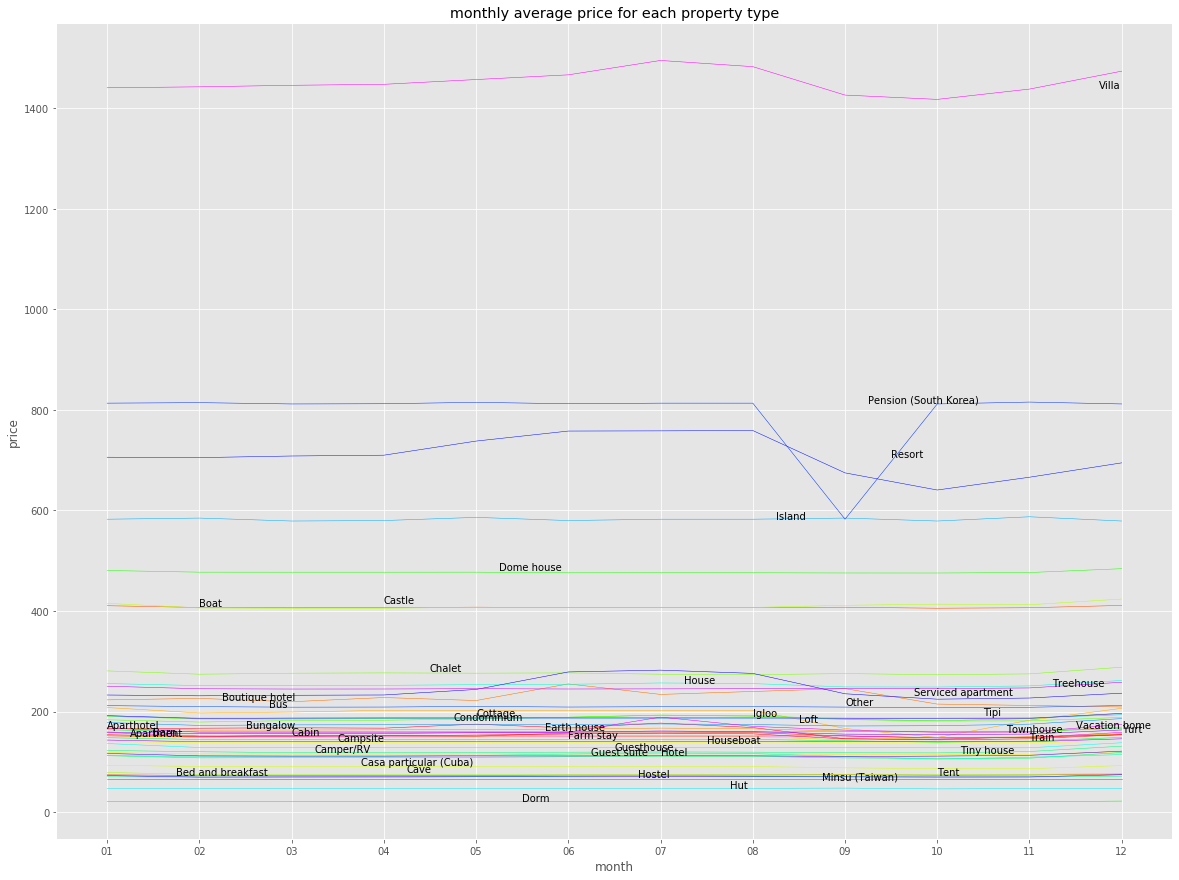

In [53]:
#from labellines import *
import matplotlib.pyplot as plt
num_property_type = df_listing.property_type.nunique()
#create color palette
cm = plt.get_cmap('gist_rainbow')
fig, ax = plt.subplots(figsize = [20,15])
plt.xticks(month)
ax.set_prop_cycle(color=[cm(1.*i/num_property_type) for i in range(num_property_type)])

# create a plot of monthly average price for each property type.
for i in range(num_property_type):
    df_t = df5.iloc[12*i:12*i+12]
    
    ax.plot(df_t['month'], df_t['price'], marker='', linewidth=0.5)
    ax.set(title='monthly average price for each property type', xlabel='month',ylabel='price')
    ax.text(0.25*i,float(df_t['price'][12*i]),df_t['property_type'][12*i])

plt.show()

## Executive Summary
**(You need to use this cell to write your executive summary)**

From the results above, it’s clear that there is a causal relationship between the time of a year and demand. The demand of a listing peaks at July and quarter 3. Summertime is traditionally the busiest time for tourism. The weather is great and it's the break time for students around the world, so it's not counter-intuitive that the demand for housing will spike up at this time. December and quarter 4 has the lowest demand among all months. During this time, the weather is getting chilly and people may feel relunctant to travel. The demand for housing will make a slight come back in the new year.

According to the law of demand, when demand increases and supply remains the same, the higher demand leads to a higher equilibrium price. This is also evident in the graph, a close correlation between demand and the price can be observed. 

However, according to graph 5, the top-notch housing does not completely comply with this general relationship between the time of a year and price/demand. Housings that are most expensive,except for villa(this might due to the lower price per bed), are not really affected by seasonality. This might because wealthy people’s traveling schedule is more flexible and does adhere to national holidays.

Overall, the pattern discussed in the section can be useful for hotels and other housing sharing service companies in terms of determining their pricing mechanism throughout the year. 